In [25]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
figurepath = 'C:/Users/tuq67942/OneDrive - Temple University/Documents/Figures/'
dependencydf = pd.read_csv('csvs/Dependency_Year_1.csv')
pairaccuracydf = pd.read_csv('csvs/PC_pairs.csv')
PCoutputdf = pd.read_csv('csvs/PC_outputdf.csv')
PCconddf = pd.read_csv('csvs/PC_outputconddf.csv')
PCoutputplotdf = pd.read_csv('csvs/PC_outputplotdf.csv')

In [6]:
# Who has an accuracy over 95%?
too_good = dependencydf[dependencydf.Accuracy>0.95]


# exclude all subjects with over 95% accuracy:
#dependencydf = dependencydf[dependencydf['Accuracy']<0.95]

In [16]:
#Does delay matter for accuracy?
print('With people with near-perfect accuracy:')
from pingouin import ttest
display(ttest(dependencydf[dependencydf['Delay']==True]['Accuracy'],
              dependencydf[dependencydf['Delay']==False]['Accuracy']))
print('Without them:')
display(ttest(dependencydf.loc[(dependencydf['Delay']==True) & (dependencydf['Accuracy']<0.95)]['Accuracy'],
              dependencydf.loc[(dependencydf['Delay']==False) & (dependencydf['Accuracy']<0.95)]['Accuracy']))

With people with near-perfect accuracy:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-9.632302,72.90676,two-sided,1.241821e-14,"[-0.46, -0.3]",2.205516,4.857e+11,1.0


Without them:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.876726,64.029189,two-sided,5.302432e-11,"[-0.42, -0.25]",1.925753,1.38e+08,1.0


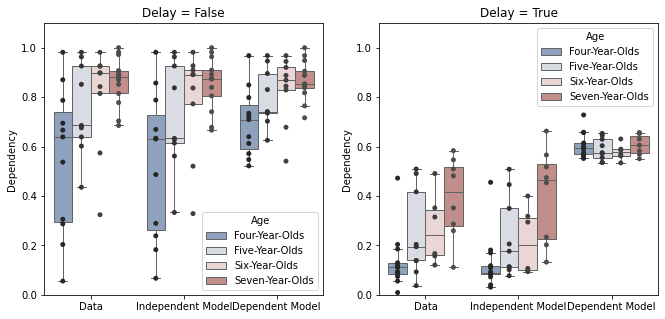

In [96]:
order = ["Four-Year-Olds","Five-Year-Olds","Six-Year-Olds","Seven-Year-Olds"]
boxprops = {'showfliers':False,'order':order}
tmp = PCoutputplotdf[PCoutputplotdf['Model-type'].str.contains('Data|Independent Model|Dependent Model')].copy()
tmp['Model-type'] = tmp['Model-type'].replace({'Apple': 'Mango', 'Banana': 'Berry'})
def numbers_to_words (number):
    number2word = {'4': "Four-Year-Olds", '5': "Five-Year-Olds", '6': "Six-Year-Olds",
            '7': "Seven-Year-Olds", '8': "Eight-Year-Olds", '9': "Nine-Year-Olds"}
    return " ".join(map(lambda i: number2word[i], str(number)))
tmp['Age'] = tmp['Age'].map(lambda age: numbers_to_words(math.floor(age)))
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
for i,delay in enumerate([False,True]):
    tmp_ = tmp[tmp.Delay == delay]
    sns.boxplot(data=tmp_, x="Model-type", y="Dependency", hue="Age", palette="vlag",ax=axes[i],
                hue_order=order, showfliers = False)
    sns.stripplot(data=tmp_, x="Model-type", y="Dependency", hue="Age", dodge=True,palette='dark:.3',hue_order=order, jitter=False,legend=False,ax=axes[i])
    axes[i].set(ylim=(0, 1.1))
    axes[i].set_title('Delay = '+str(delay))
    axes[i].set(xlabel=None)
